In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
company = pd.read_csv('/content/Company_Data.csv')

In [3]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.dtypes
company.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [4]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [30]:
x=company.iloc[:,1:10]
y=company['High']

In [27]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [6]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [8]:
clf=RandomForestClassifier(n_estimators=100)

In [9]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
y_pred=clf.predict(x_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7375


RANDOM FOREST WITH KFOLD

In [12]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [13]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.835


RANDOM FOREST WITH GRIDSEARCH

In [14]:

from sklearn.model_selection import learning_curve, GridSearchCV

In [15]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700,500,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
print (CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 500}


In [16]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True)

In [17]:
CV_rfc = GridSearchCV(rfc,param_grid,scoring='accuracy')
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                

In [18]:
y_pred1=CV_rfc.predict(x_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.75


VISUALIZATION


In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[Text(354.11538461538464, 475.65000000000003, 'Price <= 92.5\ngini = 0.487\nsamples = 250\nvalue = [232, 168]\nclass = 0'),
 Text(128.76923076923077, 339.75, 'Age <= 56.5\ngini = 0.135\nsamples = 36\nvalue = [4, 51]\nclass = 1'),
 Text(64.38461538461539, 203.85000000000002, 'gini = 0.0\nsamples = 17\nvalue = [0, 30]\nclass = 1'),
 Text(193.15384615384616, 203.85000000000002, 'Population <= 198.5\ngini = 0.269\nsamples = 19\nvalue = [4, 21]\nclass = 1'),
 Text(128.76923076923077, 67.94999999999999, 'gini = 0.48\nsamples = 4\nvalue = [3, 2]\nclass = 0'),
 Text(257.53846153846155, 67.94999999999999, 'gini = 0.095\nsamples = 15\nvalue = [1, 19]\nclass = 1'),
 Text(579.4615384615385, 339.75, 'Advertising <= 6.5\ngini = 0.448\nsamples = 214\nvalue = [228, 117]\nclass = 0'),
 Text(450.69230769230774, 203.85000000000002, 'Age <= 61.5\ngini = 0.235\nsamples = 115\nvalue = [159, 25]\nclass = 0'),
 Text(386.3076923076923, 67.94999999999999, 'gini = 0.365\nsamples = 65\nvalue = [76, 24]\nclass = 0

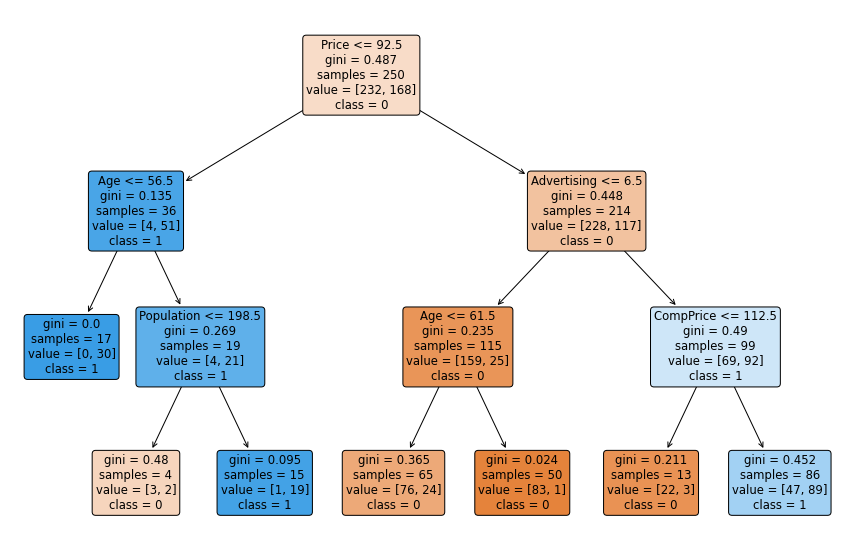

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['0','1']

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          feature_names = fn, 
               class_names=cn, 
       filled=True, impurity=True, 
          rounded=True)